# 주제: 머신러닝 모델을 적용한 네이버 쇼핑인사이트 활용
**네이버 쇼핑인사이트 api란?**   
네이버 통합검색의 쇼핑 영역과 네이버쇼핑에서의 검색 클릭 추이 데이터를 JSON 형식으로 반환합니다.   
쇼핑 분야의 분야별 검색 클릭 추이와 특정한 쇼핑 분야에서 검색 키워드별 검색 클릭 추이를 확인할 수 있습니다.   

**과일별 상품코드(21년 3월 27일 기준)**   
사과:50002160, 배:50002161, 토마토:50002162, 감귤:50002163   
딸기:50002164, 블루베리:50002173, 석류:50002189, 감:50002167   
매실:50002169, 멜론:50002170, 복분자:50002172, 수박:50002175   
키위:50002176, 참외:50002177, 천혜향:50002178, 한라봉:50002179   
포도:50002180, 자두:50002181, 복숭아:50002183, 리치:50002184   
체리:50002185, 레몬:50002186, 망고:50002187, 바나나:50002188   
오렌지:50002190, 자몽:50002191, 파인애플:50002192, 아보카도:50007220   
과일바구니:50002194, 혼합과일세트:50002195


## 1.데이터 수집 및 통합

In [228]:
#-*- coding: utf-8 -*-
import os
import sys
import urllib.request



client_id = "9XSCjkIsksljAqq9GwBf"
client_secret = "zsZpueClLD"
url = "https://openapi.naver.com/v1/datalab/shopping/categories";
# 해당 상품의 코드를 param 옆 숫자에 넣어 주어야 합니다 예;"param\":[\"넣어야하는 숫자\"]
body = "{\"startDate\":\"2017-08-01\",\"endDate\":\"2021-03-26\",\
            \"timeUnit\":\"date\",\
            \"category\":[{\"name\":\"혼합과일세트\",\"param\":[\"50002195\"]}]}";
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
response_body = response.read()

In [229]:
import json
import pandas as pd

fruit_name = "혼합과일세트"

trend = json.loads(response_body)['results'][0]
trend = pd.DataFrame(trend['data'])
trend.columns = ['period', f'{fruit_name}']

##바꿔주는 것 주의!!
혼합과일세트 = trend

In [230]:
혼합과일세트
#저장한 변수들 = [사과, 배, 토마토, 감귤, 딸기, 블루베리, 석류, 감, 매실, 멜론, 복분자, 수박, 키위, 참외, 천혜향, 한라봉,
# 포도, 자두, 복숭아, 리치, 체리, 레몬, 망고, 바나나, 오렌지, 자몽, 파인애플]

,period,혼합과일세트
0,2017-08-01,0.56844
1,2017-08-02,0.67179
2,2017-08-03,0.54547
3,2017-08-04,0.60863
4,2017-08-05,0.40192
...,...,...
1329,2021-03-22,4.24322
1330,2021-03-23,3.75516
1331,2021-03-24,3.84129
1332,2021-03-25,4.26045


In [231]:
from functools import reduce
dfs = [사과, 배, 토마토, 감귤, 딸기, 블루베리, 석류, 감, 매실, 멜론, 복분자,
       수박, 키위, 참외, 천혜향, 한라봉, 포도, 자두, 복숭아, 리치, 체리,
      레몬, 망고, 바나나, 오렌지, 자몽, 파인애플, 과일바구니, 혼합과일세트]
df_merge = reduce(lambda left, right: pd.merge(left, right, on='period', how='outer'), dfs)
df_merge
#칼럼이름 수정 및 제거
#df_merge.drop(['아보카도'], axis=1)

,period,사과,배,토마토,감귤,딸기,블루베리,석류,감,매실,...,리치,체리,레몬,망고,바나나,오렌지,자몽,파인애플,과일바구니,혼합과일세트
0,2017-08-01,9.14552,0.96383,1.29835,2.36982,3.55495,13.26658,4.69546,1.35866,1.71933,...,18.36158,5.02497,16.34033,13.23161,15.51991,1.78271,7.88983,9.51507,8.82079,0.56844
1,2017-08-02,8.52803,1.46707,1.49163,2.44481,4.05313,13.30830,9.31043,1.71925,1.48928,...,23.44632,5.16483,15.27233,15.79812,14.58872,2.05536,7.88983,7.33944,8.82079,0.67179
2,2017-08-03,8.29105,1.04912,1.18322,2.62980,3.70871,13.53775,7.86155,1.97037,1.27739,...,21.75141,4.06593,14.66714,16.01721,15.62338,1.85612,7.47566,8.38794,10.08975,0.54547
3,2017-08-04,6.91922,1.16001,1.14036,2.56980,3.40734,11.82728,7.00295,1.96394,1.10182,...,23.16384,3.87612,11.99715,13.48982,16.55457,1.63590,6.12963,6.23853,7.83039,0.60863
4,2017-08-05,5.80440,0.94677,0.93111,1.92985,2.66929,10.69044,6.06385,1.41017,0.69015,...,18.64406,3.45654,11.56995,12.08920,10.70874,1.23741,6.83371,6.05504,5.75673,0.40192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,2021-03-22,34.63284,6.63596,18.14415,14.90888,20.22264,28.93199,10.70566,3.92788,1.01101,...,23.16384,8.40159,32.78746,38.63067,41.85204,65.97105,26.58935,14.62647,36.11884,4.24322
1330,2021-03-23,32.03604,5.91095,17.78196,13.11651,19.95202,26.18898,12.50335,3.45138,1.21080,...,19.49152,7.42257,31.04307,38.21596,44.43869,63.85276,23.66949,13.00131,38.40916,3.75516
1331,2021-03-24,30.32042,5.56124,18.94837,11.60662,19.94587,25.68836,9.09578,3.09079,1.12604,...,12.42937,7.59240,28.08828,39.10015,40.55871,67.35528,24.08366,13.34207,38.06870,3.84129
1332,2021-03-25,28.11748,5.12623,17.01723,11.22915,18.27910,23.75886,10.33002,3.27752,1.09577,...,14.68926,7.88211,29.72588,37.91862,42.73150,67.80620,22.32346,13.70904,35.62364,4.26045


In [232]:
df_merge.to_excel('과일쇼피인사이트_통합.xlsx')

## 2. 머신러닝 모델적용(로지스틱 회귀)

In [233]:
#1. 모듈 및 함수 불러오기 및 폰트설정
import pandas as pd
from matplotlib import rc, font_manager
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_url = 'C:/Windows/Fonts/SDMISAENG (1).ttf'
font_name = font_manager.FontProperties(fname=font_url).get_name()
print(font_name)
plt.rcParams["font.family"] = font_name
rc('font', family=font_name)
plt.rcParams["font.size"] = 40

Sandoll MiSaeng


In [236]:
#1. 모듈 및 함수 불러오기
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#2. 변수 지정(독립변수)

#총 항목
#['사과', '배', '토마토', '감귤', '딸기', '블루베리', '석류', '감', '매실', '멜론', '복분자',
# 수박', '키위', '참외', '천혜향', '한라봉', '포도', '자두', '복숭아', '리치', '체리',
#'레몬', '망고', '바나나', '오렌지', '자몽', '파인애플', '과일바구니', '혼합과일세트']

#결과값에 해당하는 과일은 num에서 제거해주어야 합니다.아래 예는 매실을 제외해주었습니다.
num=['사과', '배', '토마토', '감귤', '딸기', '블루베리', '석류', '감', '멜론', '복분자',
       '수박', '키위', '참외', '천혜향', '한라봉', '포도', '자두', '복숭아', '리치', '체리',
      '레몬', '망고', '바나나', '오렌지', '자몽', '파인애플', '과일바구니', '혼합과일세트']
X = df_merge[num]
prospect_fruit = '매실'
Y = df_merge[prospect_fruit]

#3. 데이터 분할(학습용/평가용 데이터 세트)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#1. 모듈 및 함수 불러오기
from sklearn.linear_model import Ridge

#2. 모형 학습 및 예측
Rr=Ridge(random_state=0).fit(X_train, Y_train)
Y_pred = Rr.predict(X_test)
#print('평가용 데이터 세트에 대한 예측값\n', Y_pred)

In [239]:
#로지스틱 회귀모형으로 다른 과일들의 수치를 바탕으로 예측해본 매실의 수치
comparison = pd.DataFrame({'prediction(예측값)':Y_pred, 'ground_truth(실제값)':Y_test})
comparison.head(20)

,prediction(예측값),ground_truth(실제값)
1016,8.314209,5.22460
445,-1.812305,0.45405
458,-3.235771,0.42378
251,1.264513,1.10788
980,1.286889,1.27134
152,-3.091050,0.16951
569,-2.166527,0.35113
1057,88.210341,73.41082
241,0.419324,0.81123
381,2.459637,1.05339


In [240]:
print("학습용 데이터 세트 결정게수:{:.3f}".format(Rr.score(X_train, Y_train)))
print("평가용 데이터 세트 결정계수:{:.3f}".format(Rr.score(X_test, Y_test)))

학습용 데이터 세트 결정게수:0.881
평가용 데이터 세트 결정계수:0.879


In [241]:
print('절편: ', np.round(Rr.intercept_, 3))
print('가중치: ', np.round(Rr.coef_, 3))

절편:  1.061
가중치:  [-0.031 -0.072 -0.075  0.028 -0.005  0.92   0.056  0.061  0.254  0.327
  0.125 -0.2   -0.093  0.054 -0.222 -0.128 -0.292 -0.108 -0.152  0.396
  0.013  0.022 -0.032 -0.032  0.028 -0.125 -0.329  0.267]


## 3.결과 및 시각화

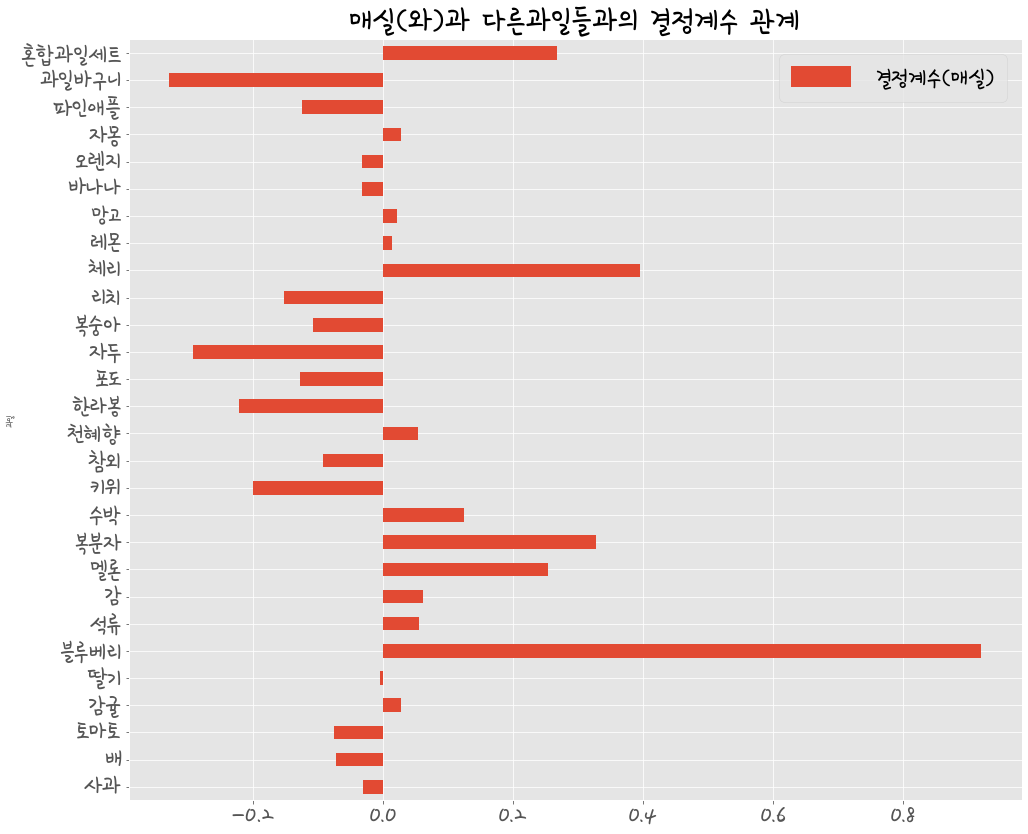

In [242]:
#결정계수 시각화
import warnings
import matplotlib
warnings.filterwarnings(action='ignore')
my_array = np.round(Rr.coef_, 3)
gang = pd.DataFrame(my_array).transpose()
nums = pd.DataFrame(num).transpose()
total = nums.append(gang).transpose()

total.columns = ['과일', '결정계수']
plt.style.use('ggplot')
total.plot('과일','결정계수', kind='barh', figsize=(16, 14), fontsize=30)
plt.title(f'{prospect_fruit}(와)과 다른과일들과의 결정계수 관계', fontsize=40)
plt.legend(labels=[f'결정계수({prospect_fruit})'], loc='best', fontsize=30)
#마이너스 부호 깨짐 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [243]:
#1. 모듈 및 함수 불러오기
from sklearn.metrics import mean_squared_error
from math import sqrt

#2. RMSE 계산
rmse= sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE: {:.3f}'.format(rmse))

RMSE: 4.659


In [245]:
df_melon = df_merge[['period', '매실' , '블루베리']]
#df_melon = df_melon[(df_melon['체리'] > 30)]
df_melon = df_melon[(df_melon['매실'] > 20) & (df_melon['블루베리'] > 20)]
df_melon.head(10)

,period,매실,블루베리
307,2018-06-04,29.73725,25.89695
308,2018-06-05,36.14239,22.73675
309,2018-06-06,39.37522,23.08093
310,2018-06-07,44.10945,26.83562
311,2018-06-08,32.28599,24.98957
313,2018-06-10,39.87770,25.05214
314,2018-06-11,45.26577,32.44680
315,2018-06-12,40.36808,30.59032
316,2018-06-13,40.01695,31.39340
317,2018-06-14,41.74839,34.49103


Text(0.5, 1.0, '매실과 블루베리의 시계열 검색량 비교')

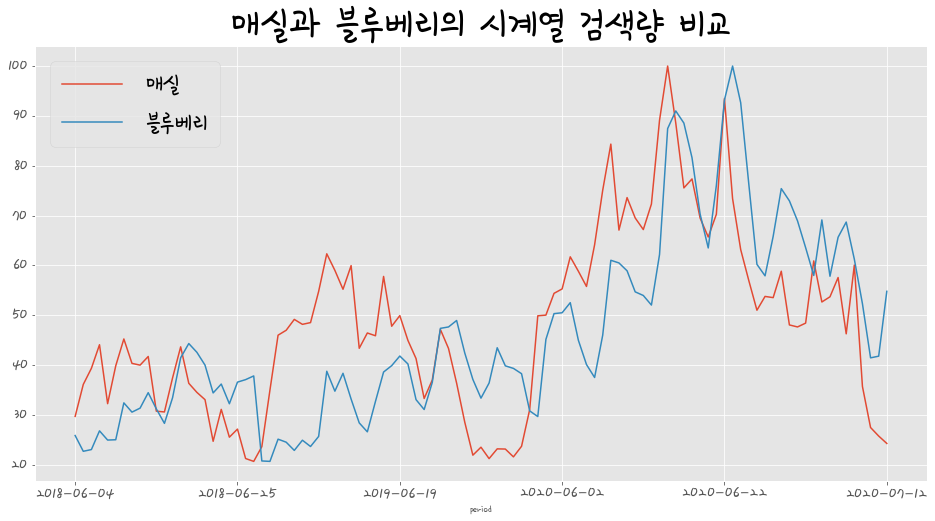

In [248]:
df_melon.plot('period', figsize=(16, 8), fontsize=20)
plt.legend(loc='best', fontsize=30)
plt.title('매실과 블루베리의 시계열 검색량 비교' , fontsize=50)
plt.xlabel('기간', fontsize=)